In [ ]:

from google.colab import files
uploaded = files.upload()

Saving symbols_valid_meta.csv to symbols_valid_meta.csv


In [ ]:

import pandas as pd
# Read the dataset
df = pd.read_csv('symbols_valid_meta.csv', sep=',')

In [ ]:
# Display first few rows
df.head()

,Nasdaq Traded,Symbol,Security Name,Listing Exchange,Market Category,ETF,Round Lot Size,Test Issue,Financial Status,CQS Symbol,NASDAQ Symbol,NextShares
0,Y,A,"Agilent Technologies, Inc. Common Stock",N,,N,100.0,N,NaN,A,A,N
1,Y,AA,Alcoa Corporation Common Stock,N,,N,100.0,N,NaN,AA,AA,N
2,Y,AAAU,Perth Mint Physical Gold ETF,P,,Y,100.0,N,NaN,AAAU,AAAU,N
3,Y,AACG,ATA Creativity Global - American Depositary Sh...,Q,G,N,100.0,N,N,NaN,AACG,N
4,Y,AADR,AdvisorShares Dorsey Wright ADR ETF,P,,Y,100.0,N,NaN,AADR,AADR,N


In [ ]:
print("Shape:", df.shape)
# Column names
print("Columns:", df.columns.tolist())
# Data types and non-null values
df.info()
# Summary statistics for numeric features
df.describe()

Shape: (8049, 12)
Columns: ['Nasdaq Traded', 'Symbol', 'Security Name', 'Listing Exchange', 'Market Category', 'ETF', 'Round Lot Size', 'Test Issue', 'Financial Status', 'CQS Symbol', 'NASDAQ Symbol', 'NextShares']
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8049 entries, 0 to 8048
Data columns (total 12 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Nasdaq Traded     8049 non-null   object 
 1   Symbol            8049 non-null   object 
 2   Security Name     8049 non-null   object 
 3   Listing Exchange  8049 non-null   object 
 4   Market Category   8049 non-null   object 
 5   ETF               8049 non-null   object 
 6   Round Lot Size    8049 non-null   float64
 7   Test Issue        8049 non-null   object 
 8   Financial Status  3383 non-null   object 
 9   CQS Symbol        4666 non-null   object 
 10  NASDAQ Symbol     8049 non-null   object 
 11  NextShares        8049 non-null   object 
dtypes: float64(1), 

,Round Lot Size
count,8049.000000
mean,99.942974
std,2.289194
min,1.000000
25%,100.000000
50%,100.000000
75%,100.000000
max,100.000000


In [ ]:

# Check for missing values
print(df.isnull().sum())
# Check for duplicates
print("Duplicate rows:", df.duplicated().sum())

Nasdaq Traded          0
Symbol                 0
Security Name          0
Listing Exchange       0
Market Category        0
ETF                    0
Round Lot Size         0
Test Issue             0
Financial Status    4666
CQS Symbol          3383
NASDAQ Symbol          0
NextShares             0
dtype: int64
Duplicate rows: 0


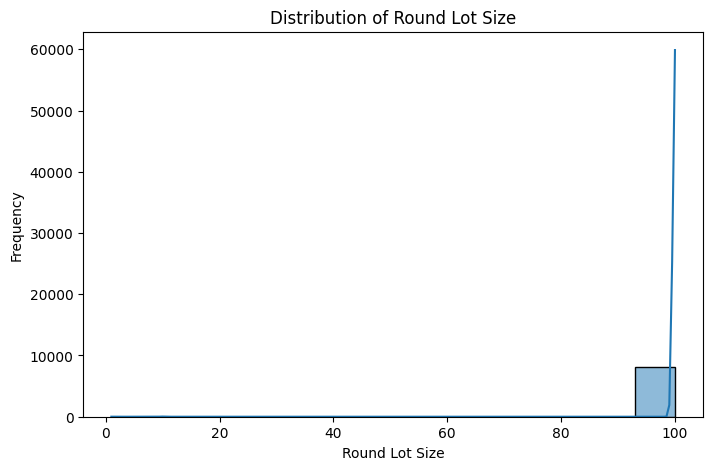

In [ ]:

import seaborn as sns
import matplotlib.pyplot as plt

# Plot distribution
plt.figure(figsize=(8, 5))
sns.histplot(df['Round Lot Size'].dropna(), kde=True)

plt.title('Distribution of Round Lot Size')
plt.xlabel('Round Lot Size')
plt.ylabel('Frequency')
plt.show()

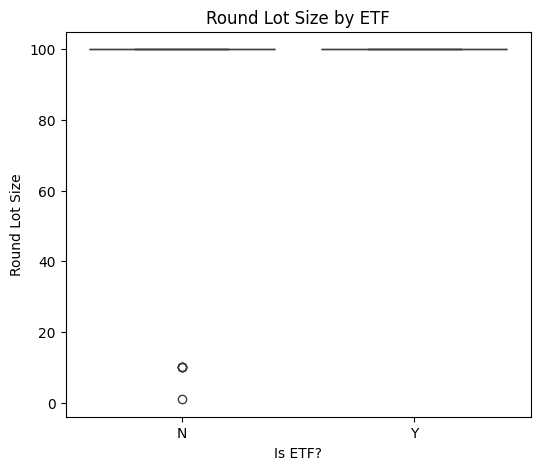

In [ ]:

# Filter out missing values
filtered_df = df[df['ETF'].notnull()]

# Plot boxplot
plt.figure(figsize=(6, 5))
sns.boxplot(x='ETF', y='Round Lot Size', data=filtered_df)

plt.title('Round Lot Size by ETF')
plt.xlabel('Is ETF?')
plt.ylabel('Round Lot Size')
plt.show()

In [ ]:
print(df.columns.tolist())

['Nasdaq Traded', 'Symbol', 'Security Name', 'Listing Exchange', 'Market Category', 'ETF', 'Round Lot Size', 'Test Issue', 'Financial Status', 'CQS Symbol', 'NASDAQ Symbol', 'NextShares']


In [ ]:
target = 'ETF'
features = df.columns.drop(target)

print("Target:", target)
print("Features:", features)

Target: ETF
Features: Index(['Nasdaq Traded', 'Symbol', 'Security Name', 'Listing Exchange',
       'Market Category', 'Round Lot Size', 'Test Issue', 'Financial Status',
       'CQS Symbol', 'NASDAQ Symbol', 'NextShares'],
      dtype='object')


In [ ]:
# Identify categorical columns
categorical_cols = df.select_dtypes(include=['object']).columns
print("Categorical Columns:", categorical_cols.tolist())

Categorical Columns: ['Nasdaq Traded', 'Symbol', 'Security Name', 'Listing Exchange', 'Market Category', 'ETF', 'Test Issue', 'Financial Status', 'CQS Symbol', 'NASDAQ Symbol', 'NextShares']


In [ ]:
from sklearn.preprocessing import LabelEncoder

# Create a copy to avoid changing original data
df_encoded = df.copy()

# Apply Label Encoding to each categorical column
le = LabelEncoder()
for col in categorical_cols:
    df_encoded[col] = le.fit_transform(df_encoded[col].astype(str))

print("Converted DataFrame (first 5 rows):")
print(df_encoded.head())

Converted DataFrame (first 5 rows):
   Nasdaq Traded  Symbol  Security Name  Listing Exchange  Market Category  \
0              0       0            242                 1                0   
1              0       1            280                 1                0   
2              0       2           5260                 2                0   
3              0       3            120                 3                1   
4              0       4            205                 2                0   

   ETF  Round Lot Size  Test Issue  Financial Status  CQS Symbol  \
0    0           100.0           0                 4           0   
1    0           100.0           0                 4           1   
2    1           100.0           0                 4           2   
3    0           100.0           0                 3        4666   
4    1           100.0           0                 4           3   

   NASDAQ Symbol  NextShares  
0              0           0  
1              1        

In [ ]:
import pandas as pd

# Assuming df is already loaded

# Apply One-Hot Encoding to all categorical columns
df_encoded = pd.get_dummies(df, drop_first=True)

print("Encoded DataFrame (first 5 rows):")
print(df_encoded.head())

print("\nEncoded column count:", df_encoded.shape[1])

Encoded DataFrame (first 5 rows):
   Round Lot Size  Symbol_AA  Symbol_AAAU  Symbol_AACG  Symbol_AADR  \
0           100.0      False        False        False        False   
1           100.0       True        False        False        False   
2           100.0      False         True        False        False   
3           100.0      False        False         True        False   
4           100.0      False        False        False         True   

   Symbol_AAL  Symbol_AAMC  Symbol_AAME  Symbol_AAN  Symbol_AAOI  ...  \
0       False        False        False       False        False  ...   
1       False        False        False       False        False  ...   
2       False        False        False       False        False  ...   
3       False        False        False       False        False  ...   
4       False        False        False       False        False  ...   

   NASDAQ Symbol_ZTO  NASDAQ Symbol_ZTR  NASDAQ Symbol_ZTS  \
0              False              Fals

In [ ]:
from sklearn.preprocessing import StandardScaler

# Encode categorical variables
df_encoded = pd.get_dummies(df, drop_first=True)

# Define target and features
target = 'ETF_Y'  # Assuming 'ETF' column after one-hot encoding results in 'ETF_Y'
X = df_encoded.drop(columns=[target])
y = df_encoded[target]

# Scale features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [ ]:

from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report

# Split data
X_train, X_test, y_train, y_test = train_test_split(
    X_scaled, y, test_size=0.2, random_state=42
)

In [ ]:

# Train model
model = RandomForestClassifier(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

# Predict
y_pred = model.predict(X_test)

In [ ]:

# Evaluate
print("Accuracy:", accuracy_score(y_test, y_pred))
print("Classification Report:\n", classification_report(y_test, y_pred))

Accuracy: 0.9385093167701863
Classification Report:
               precision    recall  f1-score   support

       False       0.94      0.98      0.96      1199
        True       0.94      0.82      0.87       411

    accuracy                           0.94      1610
   macro avg       0.94      0.90      0.92      1610
weighted avg       0.94      0.94      0.94      1610



In [ ]:

# Example input (adjust values as needed)
new_input = df.iloc[0].to_dict()
new_df = pd.DataFrame([new_input])

In [ ]:
# Example input (adjust values as needed)
new_input = df.iloc[0].to_dict()
new_df = pd.DataFrame([new_input])

In [ ]:

# Combine with full dataset to match columns
combined_df = pd.concat([df.drop(columns=['ETF']), new_df], ignore_index=True)

# One-hot encode
combined_encoded = pd.get_dummies(combined_df, drop_first=True)
combined_encoded = combined_encoded.reindex(columns=X.columns, fill_value=0)

# Scale the new input
new_input_scaled = scaler.transform(combined_encoded.tail(1))

In [ ]:
prediction = model.predict(new_input_scaled)
print("Predicted ETF:", "Yes" if prediction[0] == 1 else "No")

Predicted ETF: No


In [ ]:
!pip install gradio
import gradio as gr

def predict_etf_from_input(**kwargs):
    input_df = pd.DataFrame([kwargs])
    full_df = pd.concat([df.drop(columns=['ETF']), input_df], ignore_index=True)
    encoded = pd.get_dummies(full_df, drop_first=True)
    encoded = encoded.reindex(columns=X.columns, fill_value=0)
    scaled = scaler.transform(encoded.tail(1))
    result = model.predict(scaled)[0]
    return "Yes (ETF)" if result == 1 else "No (Not an ETF)"

# Automatically generate input widgets
input_components = [gr.Textbox(label=col) for col in df.columns if col != 'ETF']

gr.Interface(
    fn=predict_etf_from_input,
    inputs=input_components,
    outputs="text",
    title="ETF Prediction App"
).launch()

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 54.1/54.1 MB 19.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 322.9/322.9 kB 18.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 95.2/95.2 kB 6.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 11.5/11.5 MB 98.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 72.0/72.0 kB 4.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 62.5/62.5 kB 4.3 MB/s eta 0:00:00


/usr/local/lib/python3.11/dist-packages/gradio/utils.py:1018: UserWarning: Expected 0 arguments for function <function predict_etf_from_input at 0x7f2480ad0540>, received 11.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/gradio/utils.py:1026: UserWarning: Expected maximum 0 arguments for function <function predict_etf_from_input at 0x7f2480ad0540>, received 11.
  warnings.warn(


It looks like you are running Gradio on a hosted a Jupyter notebook. For the Gradio app to work, sharing must be enabled. Automatically setting `share=True` (you can turn this off by setting `share=False` in `launch()` explicitly).

Colab notebook detected. To show errors in colab notebook, set debug=True in launch()
* Running on public URL: https://068f6e8407d07b7826.gradio.live

This share link expires in 1 week. For free permanent hosting and GPU upgrades, run `gradio deploy` from the terminal in the working directory to deploy to Hugging Face Spaces (https://huggingface.co/spaces)
